In [272]:
import cv2
import copy
import pprint
import numpy as np
import matplotlib.pyplot as plt

pp = pprint.PrettyPrinter(indent=2)

def show_image_normal_window(img_title, image, height=None, width=None): 
    if height is None or width is None: 
        height = image.shape[1] 
        width = image.shape[0] 

    cv2.namedWindow(img_title, cv2.WINDOW_NORMAL) 
    cv2.resizeWindow(img_title, height, width * 2) 
    cv2.setWindowProperty(img_title, cv2.WND_PROP_ASPECT_RATIO, cv2.WINDOW_KEEPRATIO) 
    cv2.imshow(img_title, image) 
    cv2.waitKeyEx(0) 
    cv2.destroyAllWindows() 
    
def generate_random_gray_image(minimum=0, maximum=255,height=10, width=10):
    return np.random.randint(minimum, maximum, size=(height, width), dtype=np.uint8)

def generate_random_rgb_image(minimum=0, maximum=255,height=10, width=10):
    _r = np.random.randint(minimum, maximum, size=(height, width), dtype=np.uint8)
    _g = np.random.randint(minimum, maximum, size=(height, width), dtype=np.uint8)
    _b = np.random.randint(minimum, maximum, size=(height, width), dtype=np.uint8)
    return [[[r,g,b] for r,g,b in zip(r1,g1,b1)] for r1,g1,b1 in zip(_r,_g,_b)]

def chessify(input_arr, distr=2):
    arr = copy.copy(input_arr)
    for i in range(int(distr/2), len(arr)-1, distr): 
        for j in range(int(distr/2), len(arr[i])-1, distr): 
            arr[i][j] = 0
    return arr

def generate_chessified_image(minimum=0, maximum=255,height=10, width=10, distr=4):
    rand_arr = generate_random_rgb_image(minimum, maximum, height, width)
    bw = cv2.cvtColor(np.float32(rand_arr), cv2.COLOR_BGR2GRAY)
    return chessify(bw, distr)

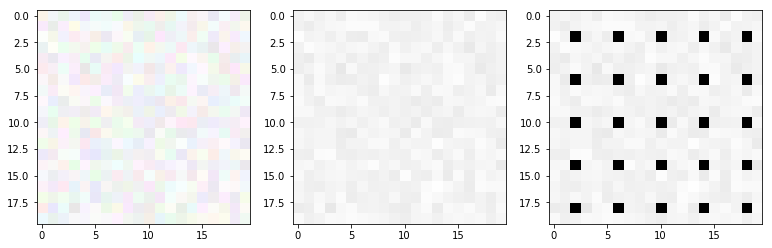

In [270]:
# UNIFORM IMAGES
#
# Experiments on creating uniformly distributed array
#
#

rand_arr = generate_random_rgb_image(minimum=231,height=20, width=20)
bw = cv2.cvtColor(np.float32(rand_arr), cv2.COLOR_BGR2GRAY)


f, axarr = plt.subplots(1,3, figsize=(13, 13))
axarr[0].imshow(rand_arr, vmin=0, vmax=255)
# We have to specify the colour mapping (cmap) 
# is gray, otherwise it will print some strange
# blueish color even though it there are not
# three channels in the image.
axarr[1].imshow(bw, cmap='gray', vmin=0, vmax=255) 
bw = ajedrize(bw, distr=4)
axarr[2].imshow(bw, cmap='gray', vmin=0, vmax=255) 
# vmin and vmax are needed parameters, if not
# specified, the range is normalized to max and
# min of provided matrix, and therefore not all
# the range (0-255) might be taken into account
# see https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html


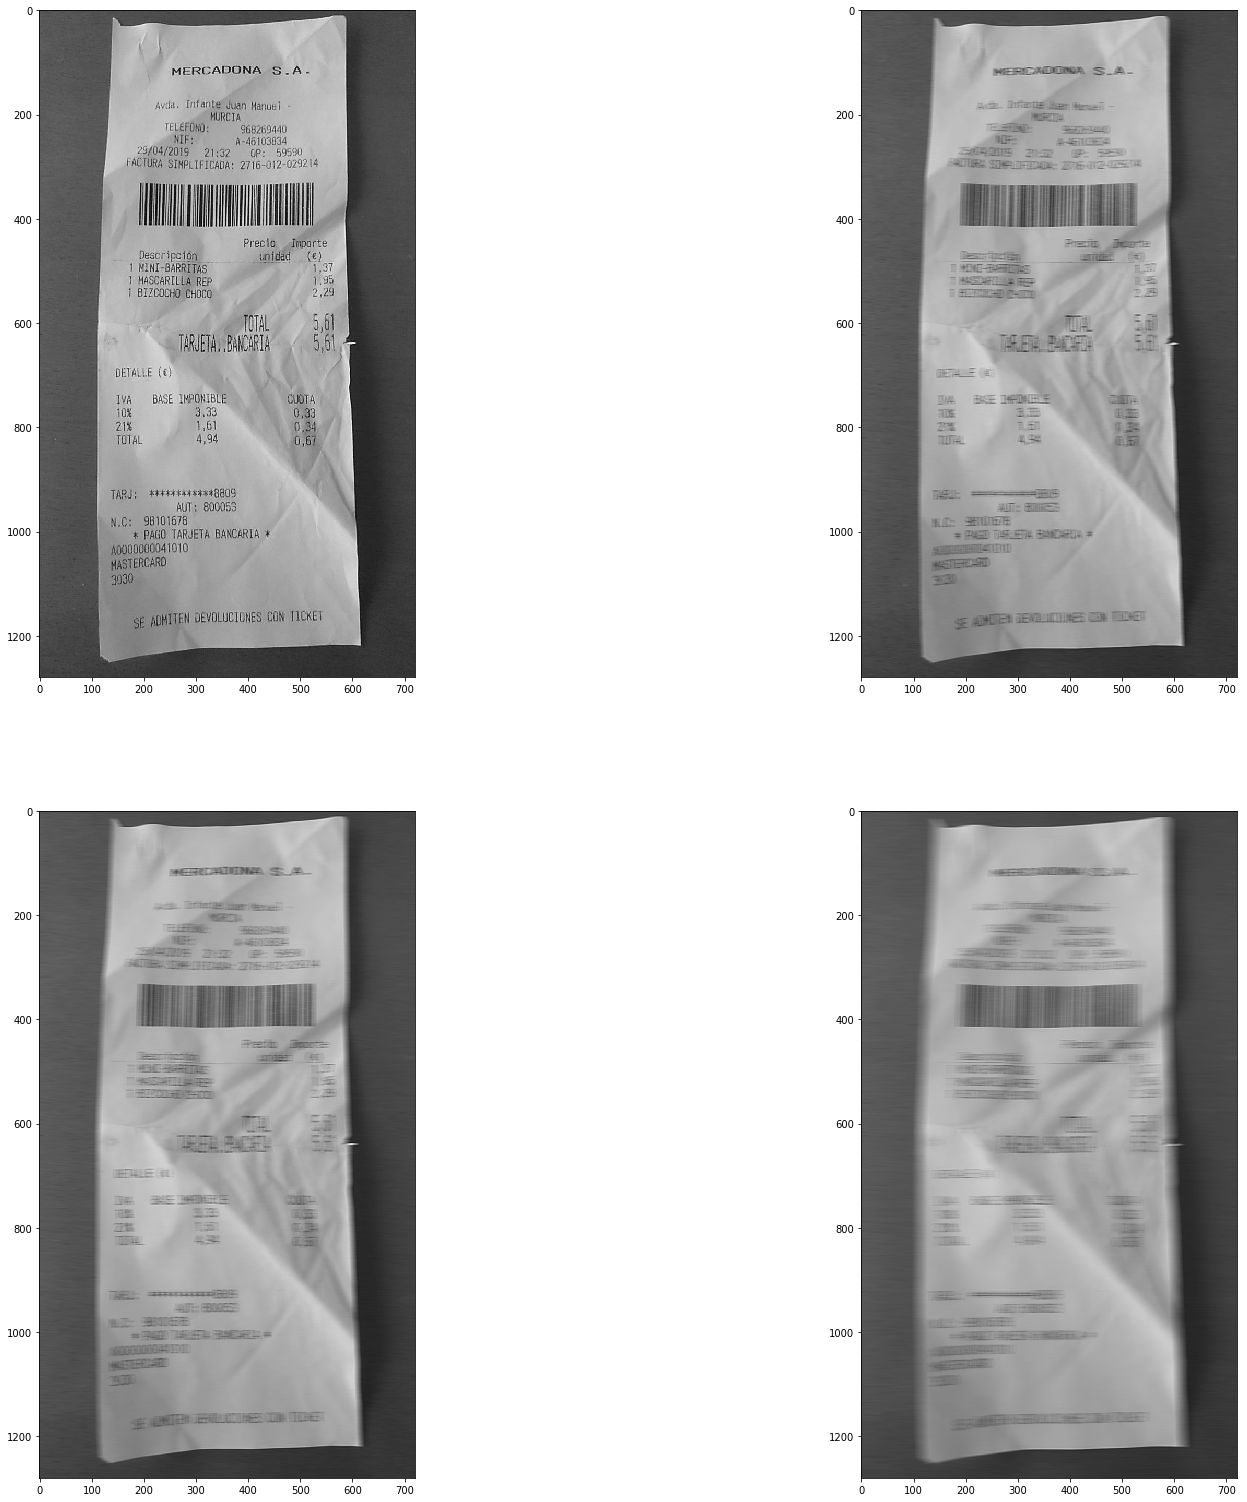

In [285]:
# HORIZONTAL BLUR IMAGES
#
# Experiments on creating uniformly distributed array
#
#

def generate_motion_kernel(size=15):    
    # generating the kernel
    kernel_motion_blur = np.zeros((size, size))
    kernel_motion_blur[int((size-1)/2), :] = np.ones(size)
    kernel_motion_blur = kernel_motion_blur / size
    return kernel_motion_blur
    

#img = generate_chessified_image(minimum=200, height=100, width=100)
img = cv2.imread('images/merc3.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


kernel_10 = generate_motion_kernel(10)
kernel_15 = generate_motion_kernel(15)
kernel_20 = generate_motion_kernel(30)

# applying the kernel to the input image
output_10 = cv2.filter2D(img, -1, kernel_10)
output_15 = cv2.filter2D(img, -1, kernel_15)
output_20 = cv2.filter2D(img, -1, kernel_20)

f, axarr = plt.subplots(2,2, figsize=(27, 27))
axarr[0,0].imshow(img, cmap='gray', vmin=0, vmax=255)
axarr[0,1].imshow(output_10, cmap='gray', vmin=0, vmax=255) 
axarr[1,0].imshow(output_15, cmap='gray', vmin=0, vmax=255) 
axarr[1,1].imshow(output_20, cmap='gray', vmin=0, vmax=255) 


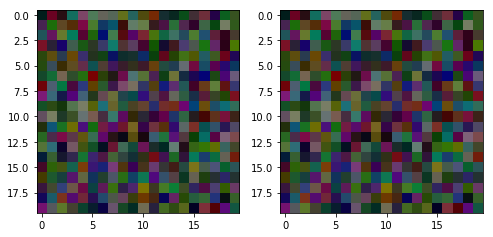

In [252]:
# RANDOM IMAGES
#
# Experiments on creating random images
#
#

rand_arr = generate_random_rgb_image(maximum=127,height=20, width=20)

bw = cv2.cvtColor(np.float32(rand_arr), cv2.COLOR_BGR2GRAY)


f, axarr = plt.subplots(1,2, figsize=(8, 8))
axarr[0].imshow(rand_arr, vmin=0, vmax=255)
# We have to specify the colour mapping (cmap) 
# is gray, otherwise it will print some strange
# blueish color even though it there are not
# three channels in the image.
axarr[1].imshow(rand_arr, cmap='gray', vmin=0, vmax=255) 
# vmin and vmax are needed parameters, if not
# specified, the range is normalized to max and
# min of provided matrix, and therefore not all
# the range (0-255) might be taken into account
# see https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html


<a list of 30 Patch objects>


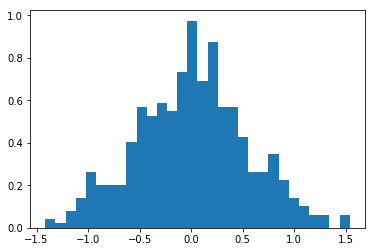

In [251]:
# RANDOM ARRAYS
#
# Experiments on generating random arrays
# with normal distribution to apply weights
# on an image.
#

mu, sigma = 0, .5 # mean and standard deviation
s = np.random.normal(mu, sigma, 500)

count, bins, ignored = plt.hist(s, 30, normed=True)
#print(count)
#print(bins)
print(ignored)

In [44]:
length = 497
margin = round(length * 0.04)
jump = 1/margin

array = np.ones(length)
pre = np.arange(0,1,jump)
post = pre[::-1]

array[0:margin] = pre
array[length-margin:] = post
print(array)

image = np.ones([10,length]) * 2
print(image)

new = array * image
print(new[0])

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1

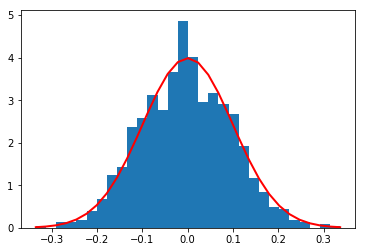

In [12]:
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

#plt.plot(s)
#plt.ylabel('some numbers')
#plt.show()